# Corner detection (the Harris detector)

* **Harris Corner detection algorithm** was developed to identify the internal corners of an image.
* **The corners** of an image are basically identified as the regions in which there are variations in large intensity of the gradient in all possible dimensions and directions.
* **Harris Corner Detection** is a method to extract the corners from the input image and to extract features from the input image.

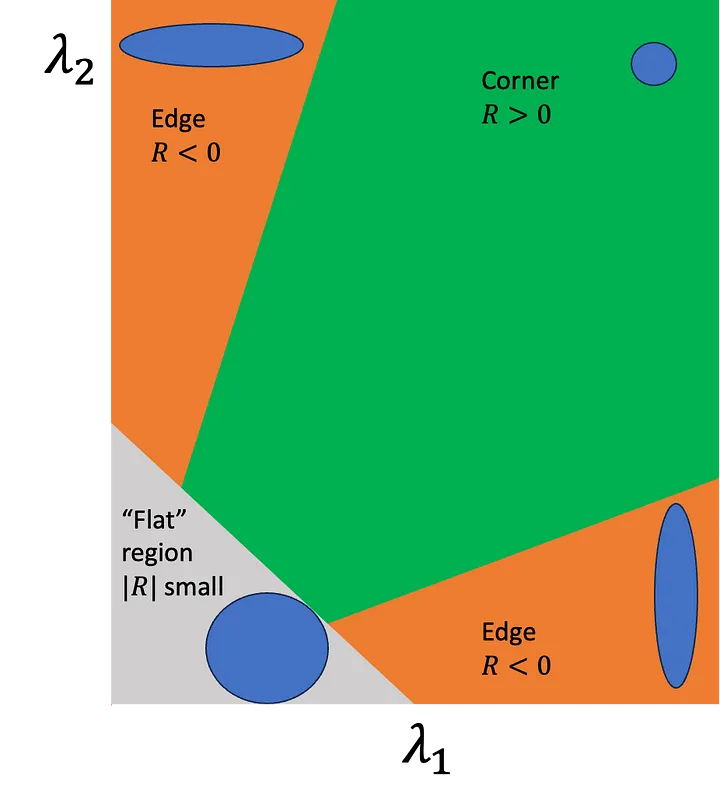

Reference : https://python.plainenglish.io/harris-corners-detector-from-theory-to-code-1d7b61289a38

In [ ]:
#Lines image
!gdown "1Mmr1MUgPlAtLr55NC-1widv60LLlbyOs"

Downloading...
From: https://drive.google.com/uc?id=1Mmr1MUgPlAtLr55NC-1widv60LLlbyOs
To: /content/lines.png
100% 13.2k/13.2k [00:00<00:00, 15.9MB/s]


In [ ]:
# Step 1: Import libraries
import cv2
import numpy as np
from PIL import Image
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

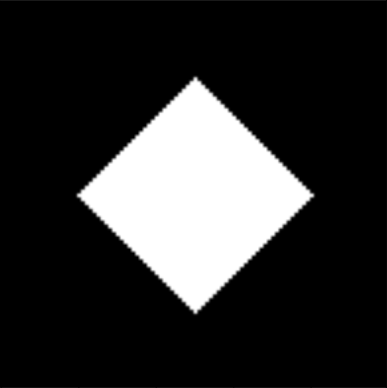

In [ ]:
# Step 2: Define variable to keep image data.
image_url = '/content/lines.png'
image = cv2.imread(image_url)
cv2_imshow(image)

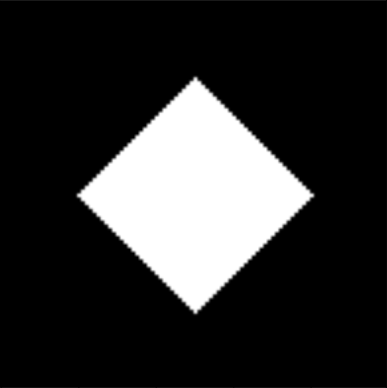

In [ ]:
# Step 3: Convert the input image into grayscale color space
operatedImage = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Step 4: Modify the data type setting to 32-bit floating point
operatedImage = np.float32(operatedImage)
cv2_imshow(operatedImage)

**Parameters of cv2.cornerHarris()**
* **src** – Input Image (Single-channel, 8-bit or floating-point)
* **dest** – Image to store the Harris detector responses. Size is same as source image
* **blockSize** – Neighborhood size ( for each pixel value blockSize * blockSize neighbourhood is considered )
* **ksize** – Aperture parameter for the Sobel() operator
* **freeParameter** – Harris detector free parameter control the weight of Trace() range of value is setting around 0.04-0.08

* **borderType** – Pixel extrapolation method ( the extrapolation mode used returns the coordinate of the pixel corresponding to the specified extrapolated pixel )

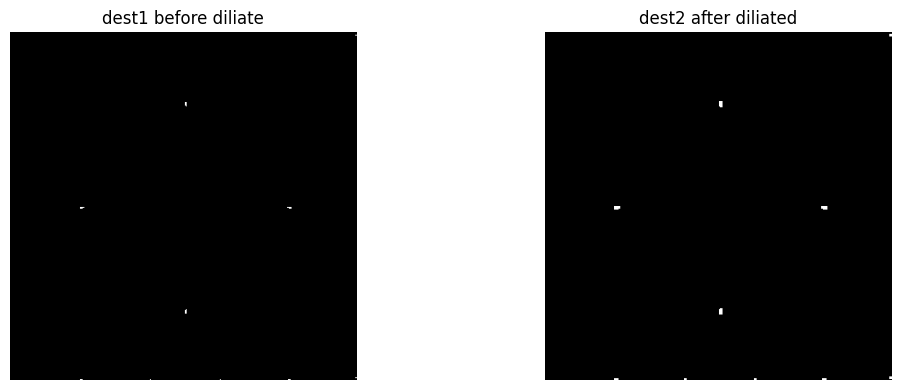

In [ ]:
# Step 5: Apply "the cv2.cornerHarris method"
# : to detect the corners with appropriate values as input parameters.
# Define vairable for keeping result from cornerHarris function
dest = cv2.cornerHarris(operatedImage, 2, 5, 0.07) #(src,blockSize,ksize,freeParameter)

# Step 6: Results are marked through the dilated corners (make corner marked position to be bigger)
dest_dilate = cv2.dilate(dest, None)

# Step 7: Visualize the results of dest
plt.figure(figsize=(12, 4))

# Step 8: results of dest
plt.subplot(1, 2, 1)
plt.imshow(dest, cmap='gray', vmin=0, vmax=1)
plt.title('dest1 before diliate')
plt.axis('off')

# Step 9: results of dest diliated
plt.subplot(1, 2, 2)
plt.imshow(dest_dilate, cmap='gray', vmin=0, vmax=1)
plt.title('dest2 after diliated')
plt.axis('off')

plt.tight_layout()
plt.show()


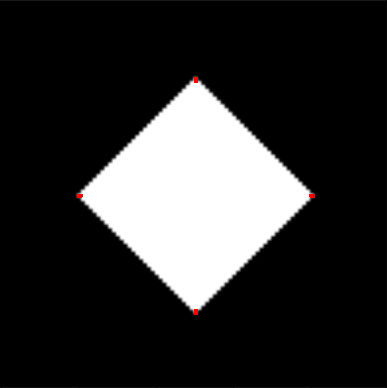

Image with Borders


In [ ]:
# Step 10: Reverting back to the original image,
# with optimal threshold value
image[dest_dilate > 0.01 * dest_dilate.max()]=[0, 0, 255] #red color
cv2_imshow(image)
print('Image with Borders')


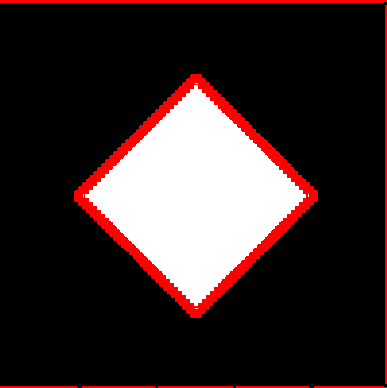

Image with Borders


In [ ]:
# Step 11: Reverting back to the original image,
# with optimal threshold value
image[dest_dilate < 0 * dest_dilate.max()]=[0, 0, 255]
cv2_imshow(image)
print('Image with Borders')


# SIFT (Scale-Invariant Feature Transform)

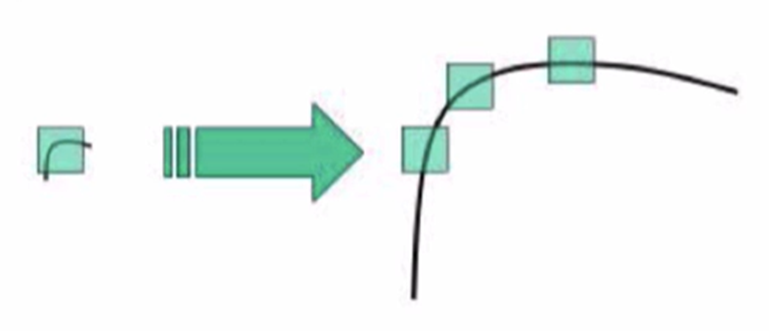

In the previous sections, we introduced the Harris corner detection algorithms. This algorithm has rotation invariance but lack of scale invariance.
Therefore, we now introduce an algorithm that simulates human vision and achieves scale invariance, namely the SIFT (Scale-Invariant Feature Transform).

- The algorithm finds extreme points in different scale space to achieve scale invariance.

- It calculates the orientation of keypoints and extracts their local features, ensuring robustness against rotation, lighting changes, affine transformations, and noise.

## Flow steps

1. Scale space extrema detection
2. Keypoint localization
3. Orientation assignment
4. Keypoint Descriptor

#### Step 1. Scale space extrema detection
（1）Construction of scale space

（2）Extrema detection

##### （1）Construction of scale space
In SIFT, the scale-space is generally constructed using a Gaussian pyramid.
1. Applying Gaussian blur to the image.
2. Downsampling the image.

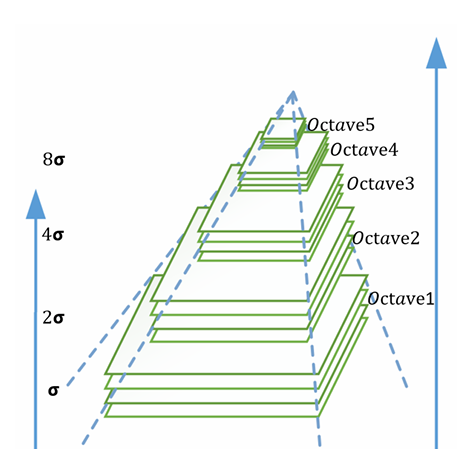

##### （2）Extrema detection

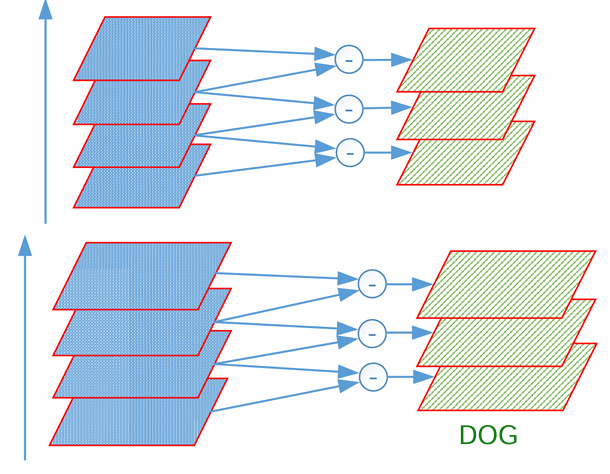

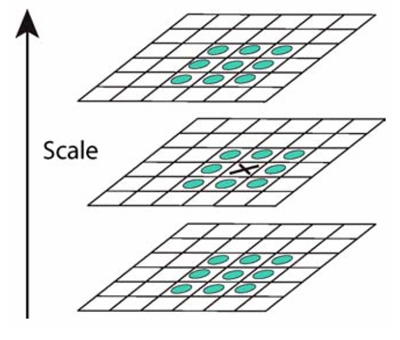

- Detecting extrema points involves comparing each pixel not only with neighboring pixels in the same layer but also with pixels in the layers above and below.

- comparing a total of 8+2×9=26 pixels

- an extrema is selected if it is either greater than all its neighboring pixels or smaller than all its neighboring pixels

## Step 2. Keypoint localization

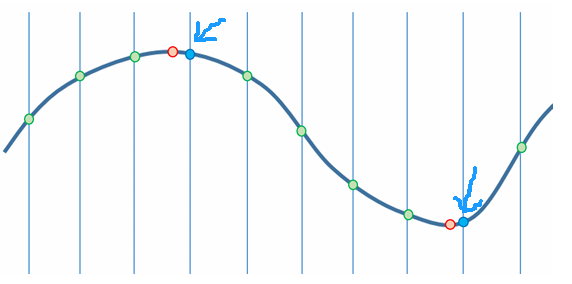


Using the second-order Taylor expansion in scale-space, the precise location of the extrema is obtained. If the intensity value of the extrema is lower than a certain threshold (typically 0.03 or 0.04), it is discarded.

## Step 3. Orientation assignment

- After the above two steps, the keypoints of the image have been fully identified, and these keypoints have scale invariance. To achieve rotation invariance, it is necessary to assign a direction to each keypoint。

- The gradient magnitude and orientation are calculated for the neighborhood pixels around each keypoint.

- A gradient orientation histogram is formed from the gradient directions of the sample points in the region around the keypoint. The orientation histogram contains 36 bins, covering a full 360-degree range (each bin represents 10 degrees).

- Within a circular region of a certain radius, the pixels whose gradient orientations fall within the range of a specific bin are identified, and their magnitudes are summed as the height of the bin.

- After determining the main orientation of the image keypoints, each keypoint contains three pieces of information (x,y,σ,θ): position, scale, and orientation. Based on this, we can define a SIFT feature region.

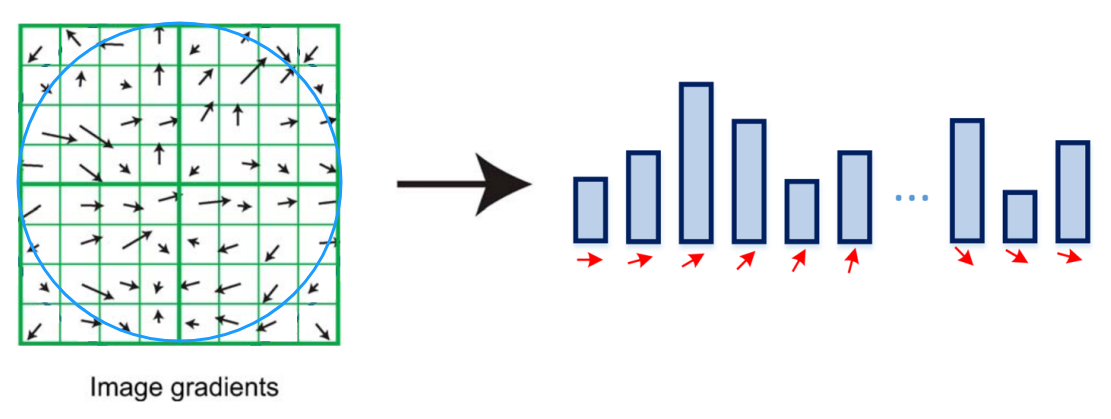

## Steo 4. Keypoint Descriptor

1. Creating the Descriptor:

  - Generate a feature vector for each keypoint to ensure invariance to rotation, scale changes, and lighting variations.

2. How to Describe Keypoints:

  - Align the Coordinate System: Align the coordinate system to the keypoint’s main orientation to ensure the descriptor is rotation-invariant.
  - Select a Window: Center a 16×16 window around the keypoint to cover the surrounding region.
  - Divide into Subregions: Divide the 16×16 window into 4×4 blocks, with each block containing 4×4=16 pixels.

  - Calculate Gradient Histograms: In each block, compute the gradient magnitudes and directions of the pixels, then create a histogram of 8 gradient directions.
3. Result:

  - Each block’s histogram has 8 directions. With 4×4 blocks, this forms a 128-dimensional feature vector (4×4×8=128). This is the SIFT descriptor.


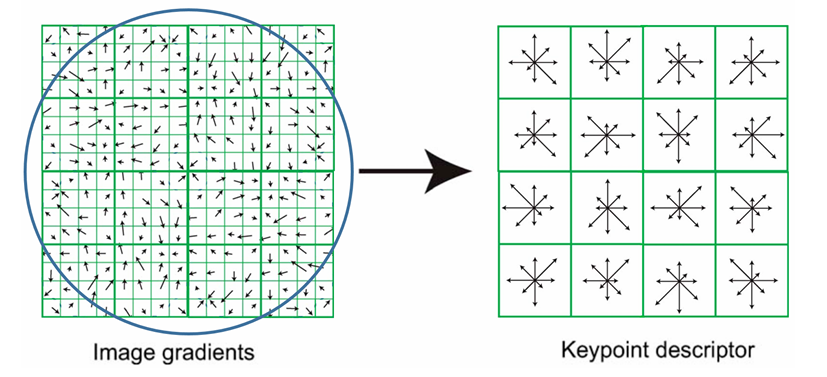

In [ ]:
!gdown "1_LabL7hjoMWPWp9PFbiN3nGC3UvUUJyv"

Downloading...
From: https://drive.google.com/uc?id=1_LabL7hjoMWPWp9PFbiN3nGC3UvUUJyv
To: /content/building1.png
100% 647k/647k [00:00<00:00, 78.6MB/s]


In [ ]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

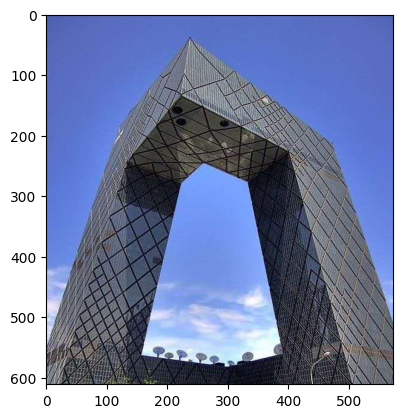

In [ ]:
img = cv.imread('/content/building1.png')
plt.imshow(img[:,:,::-1])
plt.show()

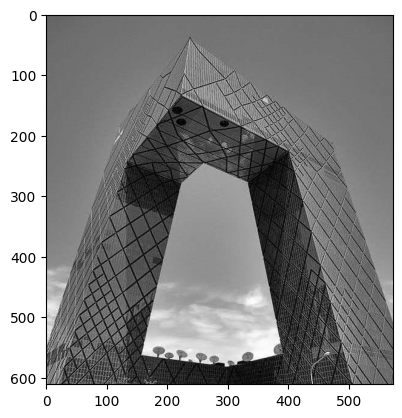

In [ ]:
gray= cv.cvtColor(img,cv.COLOR_BGR2GRAY) # to remove color information and focus only on texture features
plt.imshow(gray, cmap="gray")
plt.show()

In [ ]:
# Create a SIFT object. Using this object, we can perform keypoint detection and feature description computation
sift = cv.SIFT_create()
kp, des = sift.detectAndCompute(gray,None) #Searching keypoints and calculate descriptors on gray image


In [ ]:
print(f"Number of Keypoints detected: {len(kp)}")

Number of Keypoints detected: 1258


In [ ]:
print(des.shape)

(1258, 128)


In [ ]:
des[0]

array([ 32.,   7.,   0.,   1.,   5.,   6.,   6.,  10., 178.,  11.,   0.,
         0.,   0.,   2.,   1.,  51., 129.,   0.,   0.,   0.,   0.,   0.,
         2.,  47.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,  53.,
        13.,   0.,   1.,   6.,  15.,   8.,  16., 178.,   7.,   0.,   0.,
         3.,   8.,   2.,  59., 172.,   8.,   2.,   0.,   0.,   0.,   2.,
        32.,   0.,   1.,   2.,   0.,   0.,   0.,   1.,   1.,  59.,  15.,
         3.,   0.,   1.,   2.,   1.,  12., 178.,  57.,   2.,   0.,   1.,
         1.,   1.,  18., 178.,  18.,   2.,   0.,   0.,   2.,  17.,  22.,
         0.,   0.,   2.,   0.,   0.,   1.,  14.,   4.,  28.,  22.,   1.,
         0.,   0.,   2.,   3.,   7., 178.,  21.,   0.,   0.,   0.,   0.,
         1.,  20., 176.,  19.,   5.,   0.,   0.,   0.,   9.,  25.,   1.,
         4.,   9.,   0.,   0.,   0.,   8.,   4.], dtype=float32)

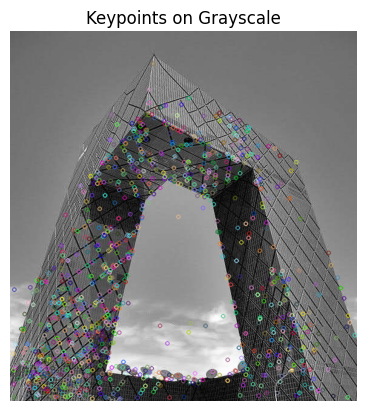

In [ ]:
img_with_keypoints = cv.drawKeypoints(gray, kp, None)
plt.imshow(img_with_keypoints, cmap='gray')
plt.title('Keypoints on Grayscale')
plt.axis('off')
plt.show()

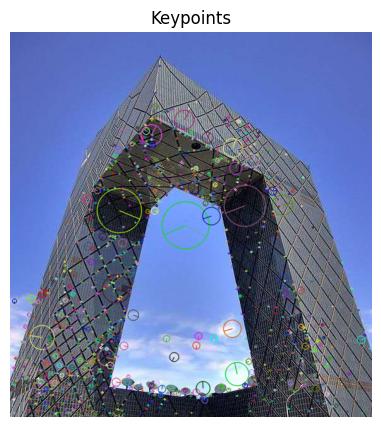

In [ ]:
img_with_keypoints_detail = cv.drawKeypoints(
    img,# input image
    kp, # keypoints
    None,# output image，if None, automatically generate new image
    flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS
)
plt.figure(figsize=(5, 5))
plt.imshow(cv.cvtColor(img_with_keypoints_detail, cv.COLOR_BGR2RGB))
plt.title('Keypoints')
plt.axis('off')
plt.show()